In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

##### Вспомогательные функции

In [2]:
def image(x, y, title):
    fig, ax = plt.subplots()
    plt.plot(x, y, 'b')
    plt.title(title)
    plt.axvline(x=0, lw=1, color='k')
    plt.axhline(y=0, lw=1, color='k')
    plt.grid()
    plt.show()
    
def live_plot(x, y, i, title, figsize=(7,5)):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    
    plt.title('t = ' + str(round(t[i], 2)), fontfamily = 'serif', fontweight = 'bold')
    
    if title == 'Численное решение':
        plt.plot(x, u_anal[i], 'b', label = 'аналитическое')
        plt.plot(x, y, color = 'r', label = 'численное')
    else:
        plt.plot(x, y, color = 'b', label = 'аналитическое')
        
    plt.legend(loc='upper right', frameon=False);
    plt.axvline(x=0, lw=1, color='k')
    plt.axhline(y=0, lw=1, color='k')
    plt.grid(True)
    plt.show();

#### Постановка задачи

Уравнение переноса: $$\frac{\partial u}{\partial t} +\frac{\partial u}{\partial x} = 0,\;\; u(x, 0) = \sin{\frac{4\pi x}L},\\0 \leq x \leq L,\;L =20;\\0 \leq t \leq T, \;T = 18 $$
Cхема с разностями против потока:
$$
\frac{y_{\;m}^{\;n+1} - y_{\;m}^{\;n}}{\tau} + \frac{y_{\;m}^{\;n} - y^{\;n}_{\;m - 1}}h = 0
$$

#### Параметры. Генерация сетки. Начальные условия.

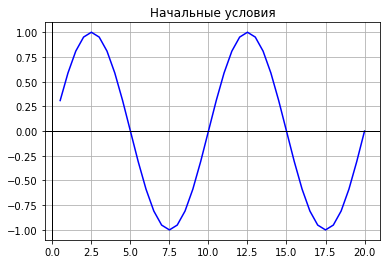

In [6]:
N = 41                            # количество узлов пространственной сетки
h = 0.5                           # шаг по пространству
L = 20                            # размер расчётной области
T = 18                            # время расчёта
Co = 1.0                          # число Куранта: Co = a * tau / h = tau/h
tau = h * Co

x = np.linspace(h, L, N-1)          # сетка по пространству
t = np.linspace(0, T, int(T/tau)) # сетка по времени

def initial():                    # начальные условия
    return np.sin(4*np.pi*x/L)

u_init = initial()
image(x, u_init, 'Начальные условия')

#### Аналитическое решение

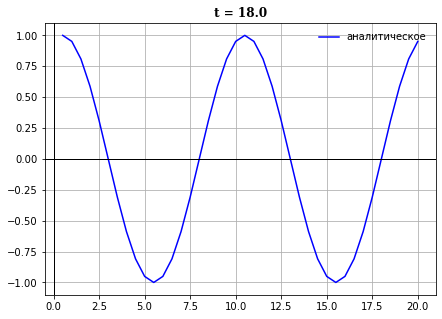

In [7]:
u_anal = []
for i in range(int(T/tau)):
    u_anal.append(np.sin(4*np.pi*(x-t[i])/L))
    
for i in range(int(T/tau)):
    live_plot(x, u_anal[i], i, 'Аналитическое решение')

#### Расчёт по схеме с центральной разностью

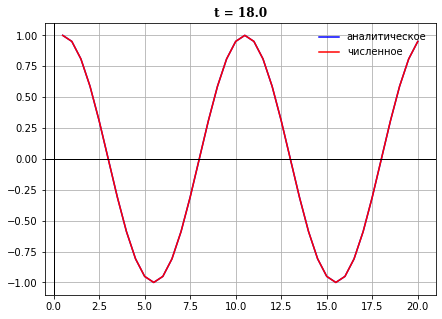

In [8]:
def solution():
    u_init = initial()
    u_next = np.zeros(N-1)
    u_curr = u_init

    for j in range(int(T/tau)):
        for i in range(N-1):
            u_next[i] = u_curr[i] + tau/h * (u_curr[i-1] - u_curr[i])
        for i in range(N-1):
            u_curr[i] = u_next[i]
        live_plot(x, u_curr, j, 'Численное решение')

solution()

Схема Лакса-Вендроффа
$$
\frac{y^{\;n+1}_{\;m} - y^{\;n}_{\;m}}{\tau} + a \frac{y^{\;n}_{\;m+1} - y^{\;n}_{\;m-1}}{2h} - \frac{a^2 \tau}2 \frac{y^{\;n}_{\;m+1} - 2 y^{\;n}_{\;m} + y^{\;n}_{\;m-1}}{h^2}=0\\
\Rightarrow
\\
y^{\;n+1}_{\;m} = y^{\;n}_{\;m}+ \left({-a \frac{y^{\;n}_{\;m+1} - y^{\;n}_{\;m-1}}{2h} + \frac{a^2 \tau}2 \frac{y^{\;n}_{\;m+1} - 2 y^{\;n}_{\;m} + y^{\;n}_{\;m-1}}{h^2}}\right) \tau
$$

#### Расчёт по схеме Лакса–Вендроффа

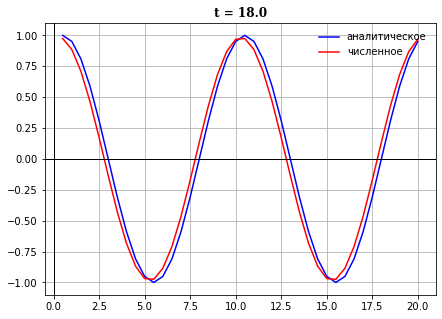

In [82]:
def solution_LV():
    u_init = initial()
    u_next = np.zeros(N-1)
    u_curr = u_init

    for j in range(int(T/tau)):
        for i in range(N-1):
            if i == 0:
                s1 = (u_curr[1] - u_curr[N-2])*(-1/(2*h))
                s2 = (u_curr[1] - 2*u_curr[0] + u_curr[N-2])*(tau/(2*h**2))
            elif i == N-2:
                s1 = (u_curr[0] - u_curr[N-3])*(-1/(2*h))
                s2 = (u_curr[0] - 2*u_curr[N-2] + u_curr[N-3])*(tau/(2*h**2))
            else:
                s1 = (u_curr[i+1] - u_curr[i-1])*(-1/(2*h))
                s2 = (u_curr[i+1] - 2*u_curr[i] + u_curr[i-1])*(tau/(2*h**2))
            u_next[i] = u_curr[i] + (s1+s2)*tau
        for i in range(N-1):
            u_curr[i] = u_next[i]
        live_plot(x, u_curr, j, 'Численное решение')

solution_LV()
